## ANN for Classification problem

In [35]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##### Import dataset

In [4]:
data = pd.read_csv("citrus.csv")

data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [5]:
data['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [6]:
len(data)

10000

##### Preprocessing

In [10]:
coding = {"name": {'orange': 0, 'grapefruit': 1}}

data.replace(coding, inplace=True)

In [11]:
data

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


##### Split dataset

In [14]:
X = data.drop("name", axis=1)
y = data.name

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

##### Build ANN

In [17]:
X_train.shape

(8000, 5)

In [19]:
model = Sequential()

In [21]:
model.add(InputLayer(input_shape=(5,)))
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

C:\Users\lily\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


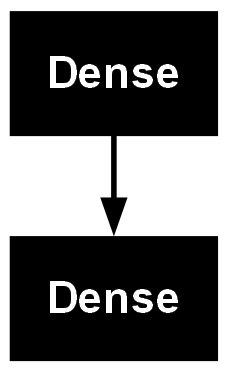

In [23]:
plot_model(model)

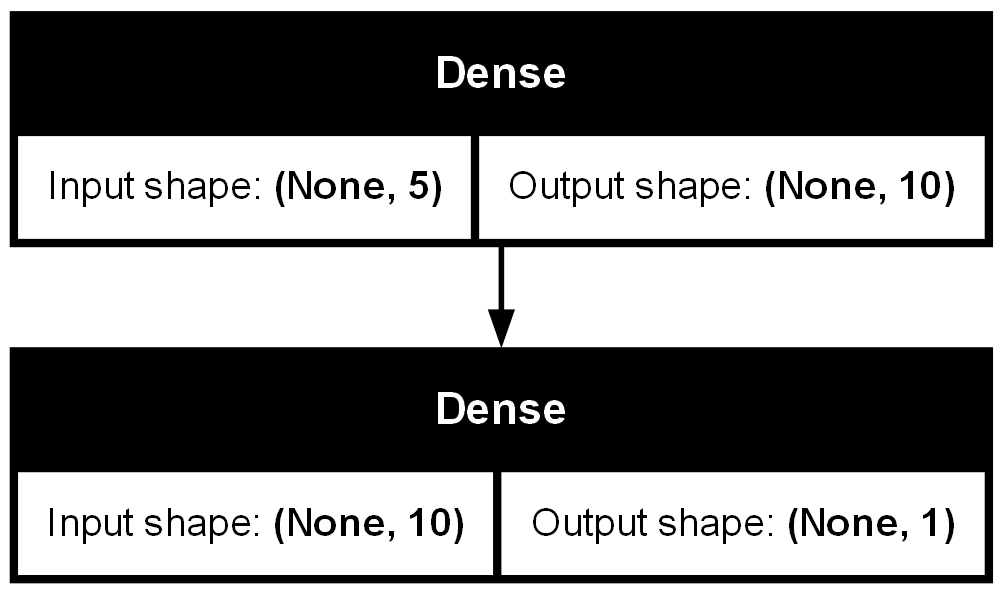

In [24]:
plot_model(model, show_shapes=True)

##### Train the model

In [25]:
model.compile(loss='binary_crossentropy', metrics = ['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=60)

Epoch 1/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.4675 - loss: 6.9661
Epoch 2/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.7927 - loss: 1.4041
Epoch 3/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8507 - loss: 0.9208
Epoch 4/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8794 - loss: 0.6930
Epoch 5/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8908 - loss: 0.5322
Epoch 6/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9024 - loss: 0.4482
Epoch 7/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9048 - loss: 0.3964
Epoch 8/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9135 - loss: 0.3461
Epoch 9/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9155 - loss: 0.2854
Epoch 10/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9140 - loss: 0.2655
Epoch 11/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9187 - loss: 0.2338
Epoch 12/60
250/250 ━━━━━━━━━━

##### Evaluate the model

In [27]:
evaluate = model.evaluate(X_test, y_test) 

evaluate[1]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9312 - loss: 0.1824


0.9294999837875366

In [28]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


In [29]:
y_test

9953    1
3850    0
4962    0
3886    0
5437    1
       ..
3919    0
162     0
7903    1
2242    0
2745    0
Name: name, Length: 2000, dtype: int64

In [30]:
y_pred

array([[0.99359995],
       [0.07747754],
       [0.9747728 ],
       ...,
       [0.99745136],
       [0.00109239],
       [0.11290191]], dtype=float32)

In [31]:
y_pred = (y_pred > 0.5).astype(int)

In [32]:
y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

<AxesSubplot: >

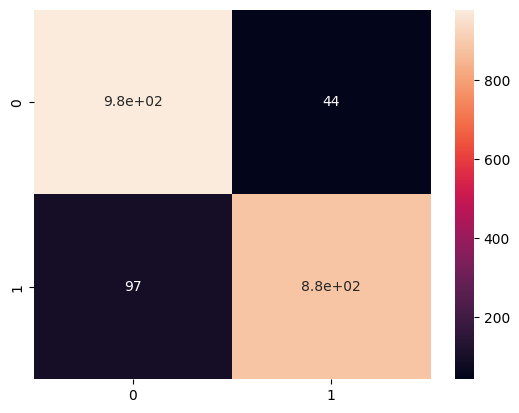

In [34]:
cm = confusion_matrix (y_test, y_pred)

sns.heatmap(cm, annot=True)

In [36]:
accuracy_score(y_test, y_pred)

0.9295

##### Adding layer and increasing the number of neurons

In [43]:
model02 = Sequential()

model02.add(InputLayer(input_shape=(5,)))
model02.add(Dense(64, activation='relu')) 
model02.add(Dense(32, activation='relu')) 
model02.add(Dense(1, activation='sigmoid')) 

model02.compile(loss='binary_crossentropy', metrics = ['accuracy'])
model02.fit(X_train, y_train, epochs=60)

evaluate = model02.evaluate(X_test, y_test) 
evaluate[1]

y_pred02 = model02.predict(X_test)


Epoch 1/60


C:\Users\lily\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.8483 - loss: 0.6274
Epoch 2/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8910 - loss: 0.3494
Epoch 3/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8943 - loss: 0.3263
Epoch 4/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8971 - loss: 0.2831
Epoch 5/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.9032 - loss: 0.2564
Epoch 6/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.9081 - loss: 0.2358
Epoch 7/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9091 - loss: 0.2371
Epoch 8/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.9117 - loss: 0.2250
Epoch 9/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9124 - loss: 0.2244
Epoch 10/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.9081 - loss: 0.2254
Epoch 11/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9178 - loss: 0.2105
Epoch 12/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [45]:
y_test

9953    1
3850    0
4962    0
3886    0
5437    1
       ..
3919    0
162     0
7903    1
2242    0
2745    0
Name: name, Length: 2000, dtype: int64

In [46]:
y_pred02

array([[9.9920732e-01],
       [1.2417953e-01],
       [9.6732092e-01],
       ...,
       [9.9971646e-01],
       [1.7615994e-06],
       [2.2671343e-01]], dtype=float32)

In [48]:
y_pred02 = (y_pred02 > 0.5).astype(int)

In [49]:
y_pred02 

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

0.9295

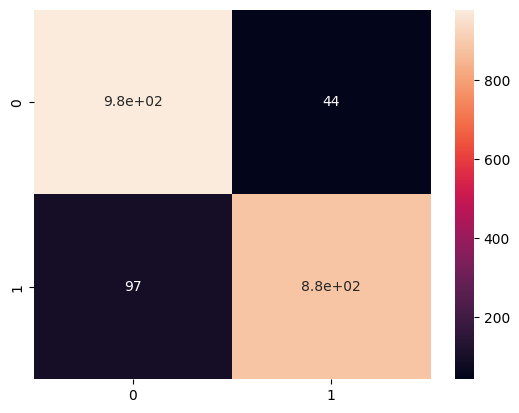

In [50]:
cm02 = confusion_matrix (y_test, y_pred02)
sns.heatmap(cm02, annot=True)

accuracy_score(y_test, y_pred02)

In [51]:
accuracy_score(y_test, y_pred02)

0.9295